In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
df = pd.read_excel('IMB381-XLS-ENG.xls',sheet_name='IPL Raw Data')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.000000,0,307,15,20.466667,8.898551,13.933333,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.000000,0,29,0,0.000000,14.500000,0.000000,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.014493,5,1059,29,36.517241,8.810316,24.896552,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.315789,0,1125,49,22.959184,6.232687,22.142857,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.714940,28,0,0,0.000000,0.000000,0.000000,2011,100000,800000


In [3]:
df.shape

(130, 26)

In [4]:
# Check for missing values
df.isnull().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR -B            0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Display basic statistics
df.describe()

,Sl.NO.,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02
mean,65.500000,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,...,111.053659,17.692308,474.669231,19.792308,23.109901,6.148114,17.382658,2009.084615,1.922308e+05,5.212231e+05
std,37.671829,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,...,35.928988,23.828146,558.600013,36.066841,20.801815,4.953320,15.273471,1.369856,1.530973e+05,4.068074e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,2.000000e+04,2.000000e+04
25%,33.250000,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,...,98.235171,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000e+05,2.250000e+05
50%,65.500000,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,...,118.510310,6.000000,295.500000,9.000000,24.786232,7.349022,19.934426,2008.000000,2.000000e+05,4.375000e+05
75%,97.750000,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,...,129.102387,29.750000,689.250000,25.500000,35.579167,8.227836,26.214286,2011.000000,2.250000e+05,7.000000e+05
max,130.000000,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,...,235.490000,129.000000,1975.000000,345.000000,126.300000,38.110000,100.200000,2011.000000,1.350000e+06,1.800000e+06


In [7]:
df = df.drop(columns=['Sl.NO.', 'PLAYER NAME'])

In [8]:
# Dividing categorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype in ['float64','int64']]
print("categorical columns: ", cat_col)
print("numerical columns: ", num_col)

categorical columns:  ['COUNTRY', 'TEAM', 'PLAYING ROLE']
numerical columns:  ['AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE']


In [9]:
# Display the resulting DataFrame
df.columns

Index(['AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS',
       'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP',
       'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'],
      dtype='object')

In [10]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
SOLD PRICE,130.0,521223.076923,406807.351419,20000.0,225000.000000,437500.000000,700000.000000,1.800000e+06
BASE PRICE,130.0,192230.769231,153097.300897,20000.0,100000.000000,200000.000000,225000.000000,1.350000e+06
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.250000,835.000000,3523.500000,1.842600e+04
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.500000,542.500000,3002.250000,1.547000e+04
RUNS-S,130.0,514.246154,615.226335,0.0,39.000000,172.000000,925.250000,2.254000e+03
RUNS-C,130.0,474.669231,558.600013,0.0,0.000000,295.500000,689.250000,1.975000e+03
T-WKTS,130.0,66.530769,142.676855,0.0,0.000000,7.000000,47.500000,8.000000e+02
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.000000,18.500000,106.000000,5.340000e+02
HS,130.0,47.430769,36.403624,0.0,16.000000,35.500000,73.750000,1.580000e+02
WKTS,130.0,19.792308,36.066841,0.0,0.000000,9.000000,25.500000,3.450000e+02


In [11]:
# Count the values in each categorical variable
for col in cat_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())
# count the values in each numerical variable:
for col in num_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())

total unique values in COUNTRY column:  10
total unique values in TEAM column:  17
total unique values in PLAYING ROLE column:  4
total unique values in AGE column:  3
total unique values in T-RUNS column:  103
total unique values in T-WKTS column:  60
total unique values in ODI-RUNS-S column:  117
total unique values in ODI-SR-B column:  118
total unique values in ODI-WKTS column:  74
total unique values in ODI-SR-BL column:  82
total unique values in CAPTAINCY EXP column:  2
total unique values in RUNS-S column:  115
total unique values in HS  column:  73
total unique values in AVE column:  115
total unique values in SR -B column:  127
total unique values in SIXERS column:  48
total unique values in RUNS-C column:  93
total unique values in WKTS column:  52
total unique values in AVE-BL column:  88
total unique values in ECON column:  93
total unique values in SR-BL column:  83
total unique values in AUCTION YEAR column:  4
total unique values in BASE PRICE column:  17
total unique v

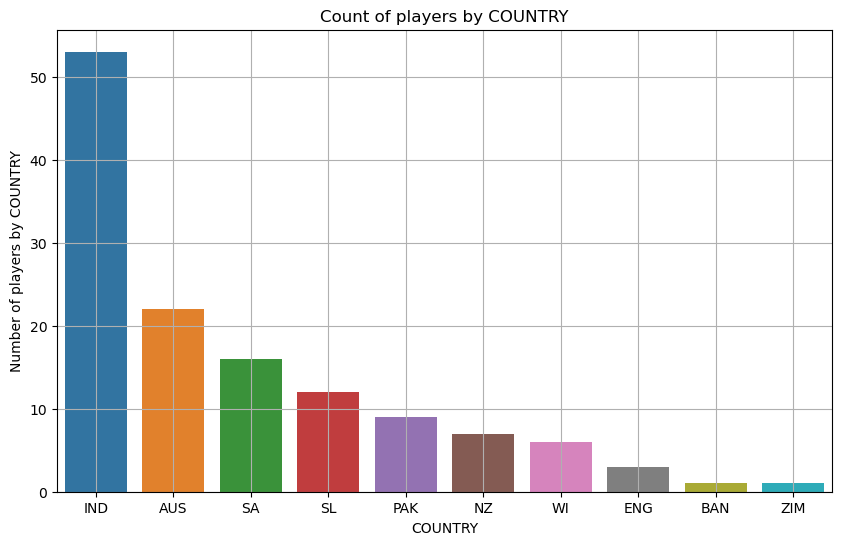

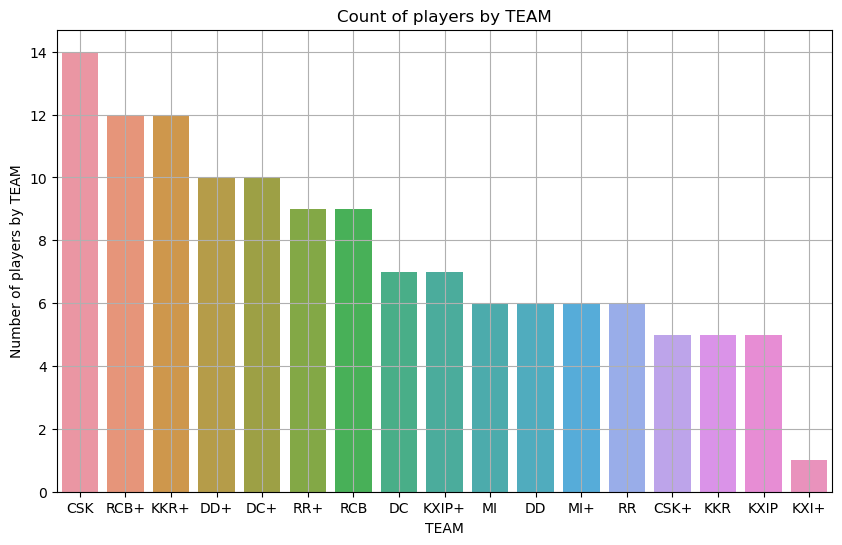

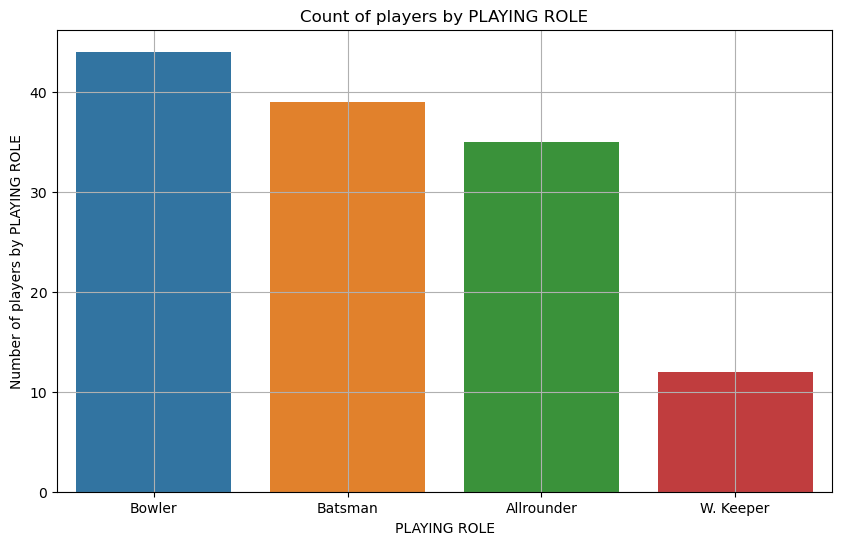

In [12]:
# count of players by country, team and playing role
cols = ['COUNTRY','TEAM','PLAYING ROLE']

def cat_plt_func(cols_list):
    for idx, col in enumerate(cols_list):
        plt.figure(idx, figsize=(10,6))
        # Get the order of categories by count
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, order=order)
        plt.title(f"Count of players by {col}")
        plt.ylabel(f"Number of players by {col}")
        plt.grid()
        plt.show()

cat_plt_func(cols)


* Indian players are higest followed by Australia

* Bolwers are highest across the teams

* CSK has a maximum number of players

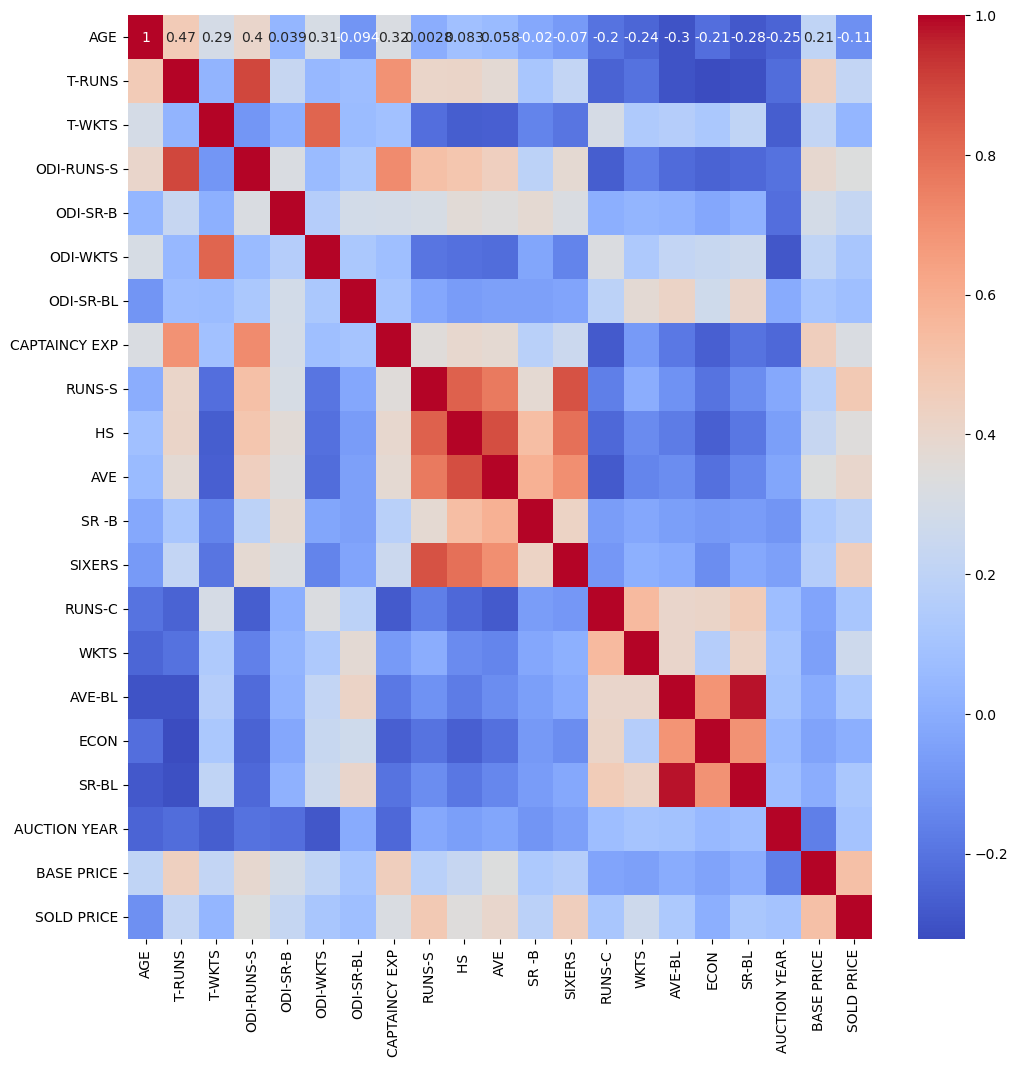

In [13]:
#heatmap of numerical columns
plt.figure(figsize=(12,12))
sns.heatmap(data=df[num_col].corr(), annot=True,cmap='coolwarm')
plt.show()

* There's high correlation between 'Run-s', 'HS', 'avg', 'sr-b' and 'sixers'

* 'Sixers' and 'Run-s' correlates with sold price

* Base price is also in correlation with sold price

* 'HS', 'AVE', 'Captaincy Exp' and 'ODI-runs-S' moderatly correlates with sold price

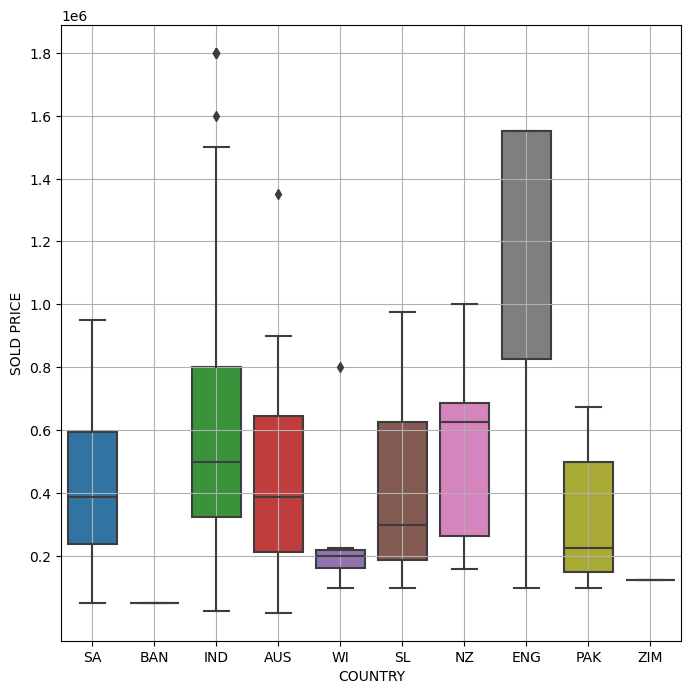

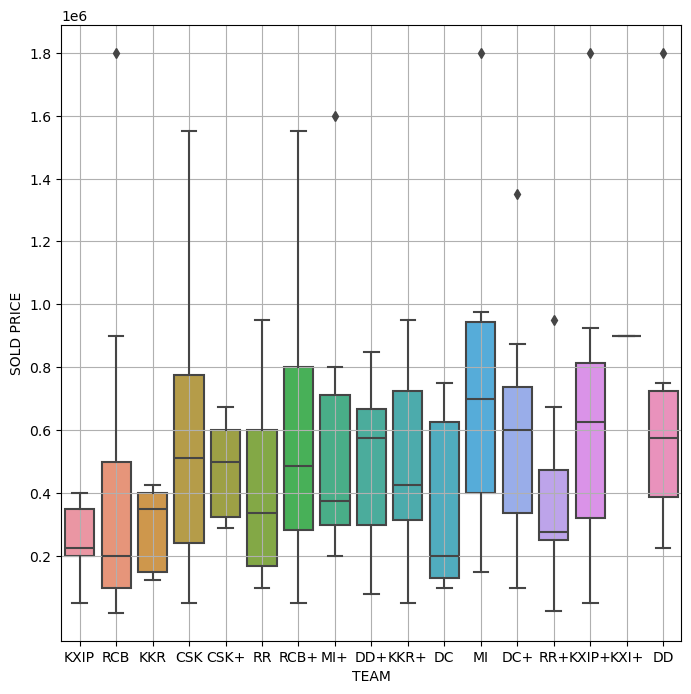

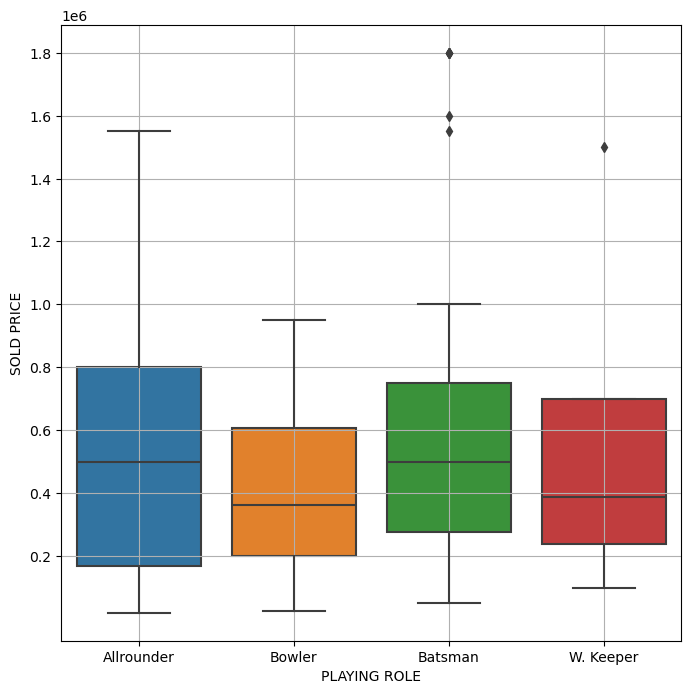

In [14]:
cols = ['COUNTRY','TEAM','PLAYING ROLE']
for idx, col in enumerate(cols):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=col, y='SOLD PRICE', data=df)
    plt.yticks(list(range(200000,2000000,200000)))
    plt.grid()
    plt.show()   

* Range of all-rounder's sold price is higher compare to others

* Batsmen sold at higher price compared to Wk or bowler

In [15]:
from scipy import stats
# Perform one-way ANOVA test to test the difference in average auction prices between batsmen,bowlers,all rounders and wicket keeper
batsmen_prices = df[df['PLAYING ROLE'] == 'Batsman']['SOLD PRICE']
bowlers_prices = df[df['PLAYING ROLE'] == 'Bowler']['SOLD PRICE']
allrounders_prices = df[df['PLAYING ROLE'] == 'Allrounder']['SOLD PRICE']
wicketkeeper_prices = df[df['PLAYING ROLE'] == 'W. Keeper']['SOLD PRICE']

anova_result = stats.f_oneway(batsmen_prices, bowlers_prices, allrounders_prices,wicketkeeper_prices)

print("One-way ANOVA Test Result:")
print(anova_result)


One-way ANOVA Test Result:
F_onewayResult(statistic=2.2518643825193188, pvalue=0.08555089712893998)


* since the p_value greater than alpha we can conclude that there is no difference between the average sold price of different playing role.

In [16]:
countries = df['COUNTRY'].unique()

# Create a list of sold prices grouped by country
country_prices = [df[df['COUNTRY'] == country]['SOLD PRICE'].dropna() for country in countries]

# Perform one-way ANOVA test to test the difference in average auction prices between different countries
anova_result = stats.f_oneway(*country_prices)

print("One-way ANOVA Test Result for Sold Price by Country:")
print(anova_result)

One-way ANOVA Test Result for Sold Price by Country:
F_onewayResult(statistic=2.423233272004287, pvalue=0.014495239873245946)


* p_value less than alpha we reject null hypothesis and conclude the nationality of the player matters in determing the sold price.

In [17]:
# cross tabulation
pd.crosstab(index=df['AGE'], 
            columns=df['PLAYING ROLE'],
            values=df['SOLD PRICE'],
            aggfunc='count')

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4.0,5.0,7.0,NaN
2,25.0,21.0,29.0,11.0
3,6.0,13.0,8.0,1.0


In [18]:
# let check whether playing for multilple effects the sold price

# Define a function to handle both the removal of '+' and the indication of multiple teams
def handle_multiple_teams(team):
    if '+' in team:
        return team.replace('+', ''), 'Yes'
    else:
        return team, 'No'

# Apply the function to the 'TEAM' column and create two new columns
df['TEAM'], df['multiple_team'] = zip(*df['TEAM'].apply(handle_multiple_teams))


In [19]:
#updating categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col

['COUNTRY', 'TEAM', 'PLAYING ROLE', 'multiple_team']

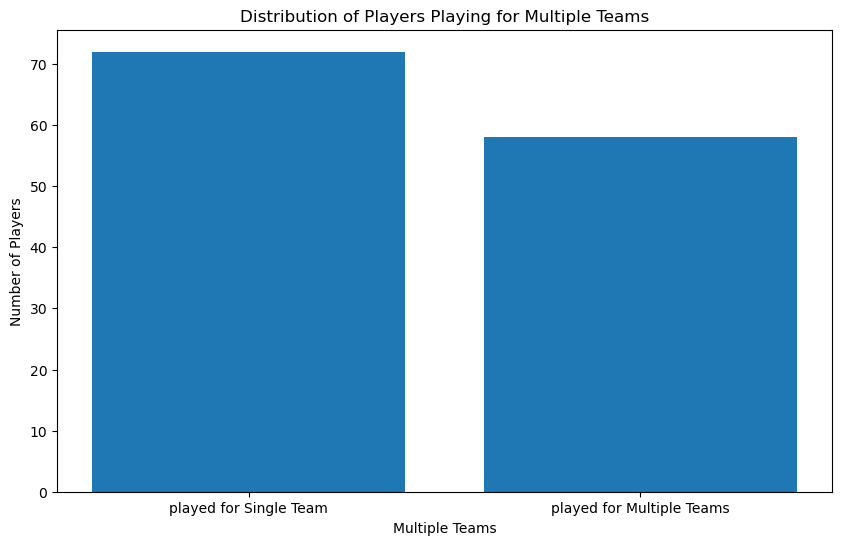

In [20]:
# distribution of players who played for multiple teams and only one team

plt.figure(figsize=(10,6))
plt.bar(df['multiple_team'].value_counts().index, df['multiple_team'].value_counts().values)
plt.title('Distribution of Players Playing for Multiple Teams')
plt.xlabel('Multiple Teams')
plt.ylabel('Number of Players')
plt.xticks(ticks=[0, 1], labels=['played for Single Team', 'played for Multiple Teams'])
plt.show()


In [21]:
df['Premium'] = df['BASE PRICE']-df['SOLD PRICE']

### 1st assumption: Features are linearly related to the label

In [22]:
correlation_matrix = df[num_col].corr()
correlation_with_sold_price = correlation_matrix['SOLD PRICE']
print(correlation_with_sold_price)


AGE             -0.106201
T-RUNS           0.216752
T-WKTS           0.035767
ODI-RUNS-S       0.337834
ODI-SR-B         0.226880
ODI-WKTS         0.112327
ODI-SR-BL        0.075408
CAPTAINCY EXP    0.318835
RUNS-S           0.478510
HS               0.347473
AVE              0.396498
SR -B            0.184269
SIXERS           0.450609
RUNS-C           0.111574
WKTS             0.262930
AVE-BL           0.128409
ECON             0.004332
SR-BL            0.118279
AUCTION YEAR     0.100595
BASE PRICE       0.523510
SOLD PRICE       1.000000
Name: SOLD PRICE, dtype: float64


### 2nd assumption : label is continuous numerical

In [23]:
df['SOLD PRICE'].dtype

dtype('int64')

### 3rd assumption: features should be independent no multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_df = df[num_col]
vif = pd.DataFrame()
vif['Feature'] = numerical_df.columns
vif['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

          Feature        VIF
17          SR-BL  91.365778
15         AVE-BL  84.892822
18   AUCTION YEAR  45.777272
0             AGE  25.784613
10            AVE  23.571707
9             HS   19.760997
11          SR -B  19.584249
3      ODI-RUNS-S  15.342605
8          RUNS-S  13.580549
4        ODI-SR-B  13.573122
1          T-RUNS  12.029889
12         SIXERS   8.338281
5        ODI-WKTS   7.590419
20     SOLD PRICE   6.799577
2          T-WKTS   6.351288
16           ECON   6.143022
19     BASE PRICE   6.039474
6       ODI-SR-BL   4.404123
13         RUNS-C   4.091354
7   CAPTAINCY EXP   3.910767
14           WKTS   2.837583


In [25]:
def calculate_vif(df):
    df = sm.add_constant(df)
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.drop(0)
    return vif

In [26]:
# Iteratively drop features with high VIF
while True:
    vif = calculate_vif(numerical_df)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)  # Print VIF values for each iteration
    max_vif = vif.iloc[0]
    if max_vif['VIF'] > 5:
        feature_to_drop = max_vif['Feature']
        print(f"Dropping feature '{feature_to_drop}' with VIF: {max_vif['VIF']}")
        numerical_df = numerical_df.drop(columns=[feature_to_drop])
    else:
        break

print("Final set of features with VIF less than 5:")
print(numerical_df.columns)

          Feature        VIF
18          SR-BL  39.672634
16         AVE-BL  37.907162
4      ODI-RUNS-S  10.273629
2          T-RUNS   8.398922
9          RUNS-S   7.972917
10            HS    7.293584
11            AVE   6.103125
13         SIXERS   5.434070
3          T-WKTS   5.228040
6        ODI-WKTS   5.206231
21     SOLD PRICE   2.705516
8   CAPTAINCY EXP   2.693072
17           ECON   2.409583
14         RUNS-C   2.386000
20     BASE PRICE   2.361860
15           WKTS   2.180513
12          SR -B   1.847668
1             AGE   1.807148
7       ODI-SR-BL   1.677592
5        ODI-SR-B   1.601490
19   AUCTION YEAR   1.322020
Dropping feature 'SR-BL' with VIF: 39.672634374930084
          Feature        VIF
4      ODI-RUNS-S  10.194983
2          T-RUNS   8.312472
9          RUNS-S   7.969127
10            HS    7.288572
11            AVE   6.071636
13         SIXERS   5.426984
3          T-WKTS   5.209583
6        ODI-WKTS   5.202906
8   CAPTAINCY EXP   2.691842
20     SOLD PRICE 

In [27]:
# encoding the label columns

ohe = OneHotEncoder(drop='first')
ohe.fit(df.select_dtypes(include='object'))

encoded_array = ohe.transform(df.select_dtypes(include='object')).toarray()
df_encoded = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out())
df_encoded.head()


,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,TEAM_DC,...,TEAM_KKR,TEAM_KXI,TEAM_KXIP,TEAM_MI,TEAM_RCB,TEAM_RR,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,multiple_team_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# combing df and df_encoded
numerical_df.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

df_combined = pd.concat([numerical_df, df_encoded], axis=1)
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     130 non-null    int64  
 1   T-RUNS                  130 non-null    int64  
 2   T-WKTS                  130 non-null    int64  
 3   ODI-SR-B                130 non-null    float64
 4   ODI-WKTS                130 non-null    int64  
 5   ODI-SR-BL               130 non-null    float64
 6   CAPTAINCY EXP           130 non-null    int64  
 7   AVE                     130 non-null    float64
 8   SR -B                   130 non-null    float64
 9   SIXERS                  130 non-null    int64  
 10  RUNS-C                  130 non-null    int64  
 11  WKTS                    130 non-null    int64  
 12  AVE-BL                  130 non-null    float64
 13  ECON                    130 non-null    float64
 14  AUCTION YEAR            130 non-null    in

In [29]:
df = df_combined.drop(columns='AUCTION YEAR')

In [30]:
# rescaling the data
numerical_data = df_combined.select_dtypes(include=['int', 'float64'])

ss = StandardScaler()
scaled_data = ss.fit_transform(numerical_data)
df_scaled = pd.DataFrame(scaled_data, columns=numerical_data.columns)
df_scaled.head()

,AGE,T-RUNS,T-WKTS,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,AVE,SR -B,SIXERS,...,TEAM_KKR,TEAM_KXI,TEAM_KXIP,TEAM_MI,TEAM_RCB,TEAM_RR,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,multiple_team_Yes
0,-0.160701,-0.657994,-0.468108,-2.758455,-0.686760,-1.277132,-0.67873,-1.693842,-3.102878,-0.745369,...,-0.387869,-0.088045,3.135815,-0.318896,-0.438931,-0.361158,-0.654654,-0.715282,-0.318896,-1.114172
1,-0.160701,-0.593006,-0.341460,0.009520,0.983269,0.133821,-0.67873,-1.693842,-3.102878,-0.745369,...,-0.387869,-0.088045,-0.318896,-0.318896,2.278262,-0.361158,-0.654654,1.398051,-0.318896,-1.114172
2,-0.160701,-0.484592,-0.060022,0.366516,1.913068,-0.042548,-0.67873,-0.014812,0.278309,-0.534721,...,2.578189,-0.088045,-0.318896,-0.318896,-0.438931,-0.361158,-0.654654,1.398051,-0.318896,-1.114172
3,-1.901634,-0.571749,-0.249993,0.519237,-0.226374,0.103801,-0.67873,-1.169019,-0.970588,-0.745369,...,-0.387869,-0.088045,-0.318896,-0.318896,-0.438931,-0.361158,-0.654654,1.398051,-0.318896,-1.114172
4,-0.160701,-0.638862,-0.468108,-0.978129,-0.686760,-1.277132,-0.67873,1.285432,0.269940,0.434258,...,-0.387869,-0.088045,-0.318896,-0.318896,-0.438931,-0.361158,1.527525,-0.715282,-0.318896,-1.114172


In [31]:
from sklearn.model_selection import train_test_split
X = sm.add_constant(df_scaled.drop('SOLD PRICE', axis=1))
y = df_scaled['SOLD PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
sm_model = sm.OLS(y_train,X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     4.609
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           3.50e-08
Time:                        11:21:50   Log-Likelihood:                -84.946
No. Observations:                 104   AIC:                             243.9
Df Residuals:                      67   BIC:                             341.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0236      0.068      0.346      0.731      -0.113       0.160
AGE                       -0.1053      0.093     -1.132      0.262      -0.291       0.080
T-RUNS                     0.0062      0.120      0.052      0.959      -0.234       0.246
T-WKTS                    -0.1231      0.158     -0.780      0.438      -0.438       0.192
ODI-SR-B                   0.0802      0.088      0.916      0.363      -0.095       0.255
ODI-WKTS                   0.1238      0.176      0.702      0.485      -0.228       0.476
ODI-SR-BL                 -0.1041      0.092     -1.129      0.263      -0.288       0.080
CAPTAINCY EXP              0.0792      0.111      0.714      0.478      -0.142       0.300
AVE                        0.1235      0.154      0.804      0.424      -0.183       0.430
SR -B                     -0.0984      0.105     -0.934      0.354      -0.309       0.112
SIXERS                     0.2788      0.119      2.337      0.022       0.041       0.517
RUNS-C                    -0.1608      0.132     -1.222      0.226      -0.423       0.102
WKTS                       0.3290      0.101      3.253      0.002       0.127       0.531
AVE-BL                    -0.1431      0.151     -0.950      0.345      -0.444       0.157
ECON                       0.0310      0.129      0.239      0.812      -0.227       0.289
AUCTION YEAR               0.2159      0.086      2.504      0.015       0.044       0.388
BASE PRICE                 0.6655      0.115      5.764      0.000       0.435       0.896
COUNTRY_BAN               -0.0231      0.081     -0.286      0.776      -0.184       0.138
COUNTRY_ENG               -0.1917      0.101     -1.895      0.062      -0.394       0.010
COUNTRY_IND                0.2843      0.126      2.249      0.028       0.032       0.537
COUNTRY_NZ                 0.0110      0.086      0.128      0.899      -0.160       0.182
COUNTRY_PAK                0.0024      0.104      0.023      0.982      -0.204       0.209
COUNTRY_SA                 0.0378      0.095      0.397      0.693      -0.152       0.228
COUNTRY_SL                -0.0434      0.104     -0.417      0.678      -0.251       0.164
COUNTRY_WI                -0.1066      0.100     -1.063      0.292      -0.307       0.094
COUNTRY_ZIM                0.0402      0.073      0.549      0.585      -0.106       0.186
TEAM_DC                    0.1115      0.112      0.996      0.323      -0.112       0.335
TEAM_DD                    0.0405      0.106      0.382      0.704      -0.171       0.252
TEAM_KKR                  -0.0361      0.105     -0.342      0.733      -0.246       0.174
TEAM_KXI                  -0.0021      0.006     -0.346      0.731      -0.014       0.010
TEAM_KXIP                  0.0318      0.103      0.309      0.759      -0.174  

### assumption 4 : rows are independent (no autocorrelation)

* durbin-watson statistic close to 2 indicates the rows are independent

### Assumption 5: residuals are homoskedastic we use Goldfeld Quant test to confirm
H0: no heteroskedasticity or homoskedastic 

H1: heteroskedasticity or no homoskedasticity


In [33]:
y_train_pred = sm_model.predict(X_train)
y_pred = sm_model.predict(X_test)

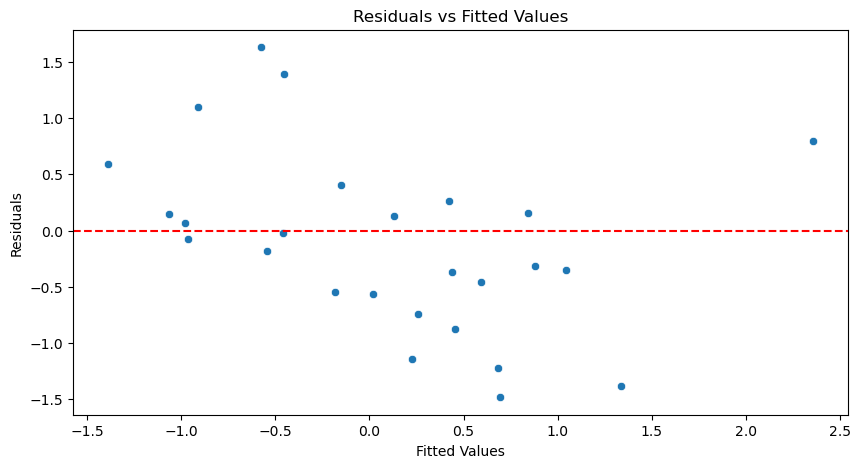

Breusch-Pagan test p-value: 0.9120691393852769


In [34]:
# Calculate residuals
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = y_test - y_pred

# Plotting residuals vs fitted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Perform the Breusch-Pagan test
_, pval, _, _ = het_breuschpagan(residuals, X_test)

print(f'Breusch-Pagan test p-value: {pval}')

* since p_value>0.05 we retain null hypothesis and conclude that residual are homoskedastic and from the chart we can observe that residual are scattered without a pattern

### Assumption 6 : Residuals are normally distributed. (jarque bera or shapiro's tes)
H0: Residuals are normally distributed

H1: Residuals are not normally distributed

c:\Users\PENOSH YADAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


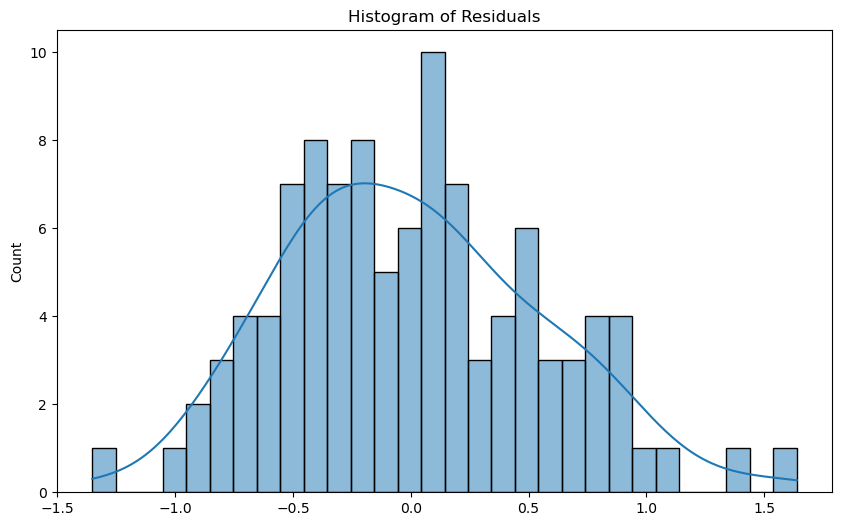

<Figure size 1000x600 with 0 Axes>

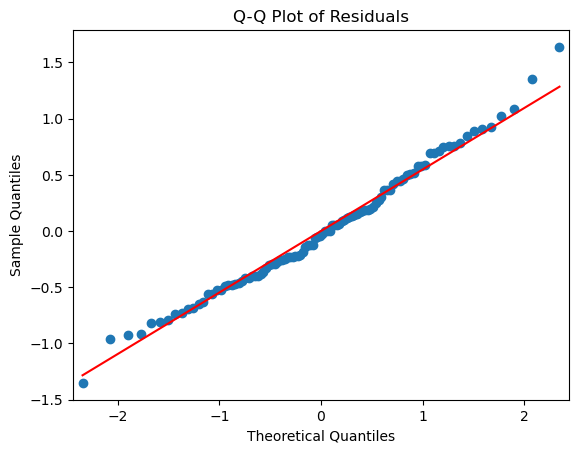

Statistics=0.988, p=0.500


In [35]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
# Calculate residuals
residuals = sm_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.show()

# Generate Q-Q plot
plt.figure(figsize=(10,6))
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
stat, p = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

* since p_value>0.05 we retain null hypothesis and conclude that residual are normally distributed

### Observations from model summary

In [36]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     4.609
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           3.50e-08
Time:                        11:21:52   Log-Likelihood:                -84.946
No. Observations:                 104   AIC:                             243.9
Df Residuals:                      67   BIC:                             341.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0236      0.068      0.346      0.731      -0.113       0.160
AGE                       -0.1053      0.093     -1.132      0.262      -0.291       0.080
T-RUNS                     0.0062      0.120      0.052      0.959      -0.234       0.246
T-WKTS                    -0.1231      0.158     -0.780      0.438      -0.438       0.192
ODI-SR-B                   0.0802      0.088      0.916      0.363      -0.095       0.255
ODI-WKTS                   0.1238      0.176      0.702      0.485      -0.228       0.476
ODI-SR-BL                 -0.1041      0.092     -1.129      0.263      -0.288       0.080
CAPTAINCY EXP              0.0792      0.111      0.714      0.478      -0.142       0.300
AVE                        0.1235      0.154      0.804      0.424      -0.183       0.430
SR -B                     -0.0984      0.105     -0.934      0.354      -0.309       0.112
SIXERS                     0.2788      0.119      2.337      0.022       0.041       0.517
RUNS-C                    -0.1608      0.132     -1.222      0.226      -0.423       0.102
WKTS                       0.3290      0.101      3.253      0.002       0.127       0.531
AVE-BL                    -0.1431      0.151     -0.950      0.345      -0.444       0.157
ECON                       0.0310      0.129      0.239      0.812      -0.227       0.289
AUCTION YEAR               0.2159      0.086      2.504      0.015       0.044       0.388
BASE PRICE                 0.6655      0.115      5.764      0.000       0.435       0.896
COUNTRY_BAN               -0.0231      0.081     -0.286      0.776      -0.184       0.138
COUNTRY_ENG               -0.1917      0.101     -1.895      0.062      -0.394       0.010
COUNTRY_IND                0.2843      0.126      2.249      0.028       0.032       0.537
COUNTRY_NZ                 0.0110      0.086      0.128      0.899      -0.160       0.182
COUNTRY_PAK                0.0024      0.104      0.023      0.982      -0.204       0.209
COUNTRY_SA                 0.0378      0.095      0.397      0.693      -0.152       0.228
COUNTRY_SL                -0.0434      0.104     -0.417      0.678      -0.251       0.164
COUNTRY_WI                -0.1066      0.100     -1.063      0.292      -0.307       0.094
COUNTRY_ZIM                0.0402      0.073      0.549      0.585      -0.106       0.186
TEAM_DC                    0.1115      0.112      0.996      0.323      -0.112       0.335
TEAM_DD                    0.0405      0.106      0.382      0.704      -0.171       0.252
TEAM_KKR                  -0.0361      0.105     -0.342      0.733      -0.246       0.174
TEAM_KXI                  -0.0021      0.006     -0.346      0.731      -0.014       0.010
TEAM_KXIP                  0.0318      0.103      0.309      0.759      -0.174  

### Significant Predictors
*BASE PRICE (coef: 0.6655, p < 0.001)
This suggests that a player's initial valuation is a critical determinant of the final sold price, highlighting the importance of setting a competitive yet realistic base price.

*WKTS (coef: 0.3290, p = 0.002)
Teams highly value players who are effective in taking wickets, which directly influences their market price.

*SIXERS (coef: 0.2788, p = 0.022)
Power-hitting ability is a prized skill in cricket, likely driving up a player’s auction price.

*AUCTION YEAR (coef: 0.2159, p = 0.015)
Recent years have seen higher auction prices, possibly due to increased competition among teams or higher revenues in the league.

*COUNTRY_IND (coef: 0.2843, p = 0.028)
Local players (Indian) tend to attract higher bids, possibly due to better marketability and fan following.

In [37]:
p_values = sm_model.pvalues.sort_values()

# Define the significance level (commonly 0.05)
significance_level = 0.05

# Find features with p-values greater than the significance level
insignificant_features = p_values[p_values > significance_level].index

# Print the insignificant features
print("Insignificant features:")
for feature in insignificant_features:
    print(f"{feature}: p-value = {p_values[feature]:.4f}")

# Example of how to filter out insignificant features from the training set
significant_features = p_values[p_values <= significance_level].index
X_train_significant = X_train[significant_features]


Insignificant features:
COUNTRY_ENG: p-value = 0.0624
PLAYING ROLE_W. Keeper: p-value = 0.0728
PLAYING ROLE_Batsman: p-value = 0.1020
PLAYING ROLE_Bowler: p-value = 0.1439
TEAM_MI: p-value = 0.2096
RUNS-C: p-value = 0.2261
AGE: p-value = 0.2619
ODI-SR-BL: p-value = 0.2628
COUNTRY_WI: p-value = 0.2918
TEAM_DC: p-value = 0.3227
AVE-BL: p-value = 0.3453
SR -B: p-value = 0.3536
ODI-SR-B: p-value = 0.3630
AVE: p-value = 0.4243
T-WKTS: p-value = 0.4380
CAPTAINCY EXP: p-value = 0.4776
ODI-WKTS: p-value = 0.4850
multiple_team_Yes: p-value = 0.5280
COUNTRY_ZIM: p-value = 0.5846
COUNTRY_SL: p-value = 0.6778
COUNTRY_SA: p-value = 0.6928
TEAM_DD: p-value = 0.7039
const: p-value = 0.7307
TEAM_KXI: p-value = 0.7307
TEAM_KKR: p-value = 0.7333
TEAM_KXIP: p-value = 0.7586
COUNTRY_BAN: p-value = 0.7757
TEAM_RCB: p-value = 0.7906
ECON: p-value = 0.8116
TEAM_RR: p-value = 0.8824
COUNTRY_NZ: p-value = 0.8986
T-RUNS: p-value = 0.9587
COUNTRY_PAK: p-value = 0.9819


* out of 38 features 33 features have proved to be insignificant

### lets account feature interaction and fit the model with interaction effect

In [38]:
df_interactions = df_scaled.copy()

In [39]:
df_interactions.columns

Index(['AGE', 'T-RUNS', 'T-WKTS', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE', 'COUNTRY_BAN',
       'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA',
       'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'TEAM_DC', 'TEAM_DD',
       'TEAM_KKR', 'TEAM_KXI', 'TEAM_KXIP', 'TEAM_MI', 'TEAM_RCB', 'TEAM_RR',
       'PLAYING ROLE_Batsman', 'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper',
       'multiple_team_Yes'],
      dtype='object')

* possible interactions which could explain the variance in y

In [40]:
# Create interaction terms
df_interactions['COUNTRY_ENG * PLAYING ROLE_W. Keeper'] = df_interactions['COUNTRY_ENG'] * df_interactions['PLAYING ROLE_W. Keeper']
df_interactions['COUNTRY_ENG * PLAYING ROLE_Batsman'] = df_interactions['COUNTRY_ENG'] * df_interactions['PLAYING ROLE_Batsman']
df_interactions['COUNTRY_ENG * PLAYING ROLE_Bowler'] = df_interactions['COUNTRY_ENG'] * df_interactions['PLAYING ROLE_Bowler']
df_interactions['COUNTRY_ENG * TEAM_MI'] = df_interactions['COUNTRY_ENG'] * df_interactions['TEAM_MI']
df_interactions['PLAYING ROLE_W. Keeper * RUNS-C'] = df_interactions['PLAYING ROLE_W. Keeper'] * df_interactions['RUNS-C']
df_interactions['PLAYING ROLE_W. Keeper * TEAM_MI'] = df_interactions['PLAYING ROLE_W. Keeper'] * df_interactions['TEAM_MI']
df_interactions['PLAYING ROLE_Batsman * RUNS-C'] = df_interactions['PLAYING ROLE_Batsman'] * df_interactions['RUNS-C']
df_interactions['PLAYING ROLE_Batsman * TEAM_MI'] = df_interactions['PLAYING ROLE_Batsman'] * df_interactions['TEAM_MI']
df_interactions['PLAYING ROLE_Bowler * TEAM_MI'] = df_interactions['PLAYING ROLE_Bowler'] * df_interactions['TEAM_MI']
df_interactions['PLAYING ROLE_Bowler * WKTS'] = df_interactions['PLAYING ROLE_Bowler'] * df_interactions['WKTS']
df_interactions['PLAYING ROLE_W. Keeper * SIXERS'] = df_interactions['PLAYING ROLE_W. Keeper'] * df_interactions['SIXERS']


In [41]:
cols_to_drop = ['COUNTRY_ENG', 'PLAYING ROLE_W. Keeper', 'PLAYING ROLE_Batsman', 'PLAYING ROLE_Bowler', 'TEAM_MI', 'RUNS-C', 'WKTS', 'SIXERS']
df_interactions_dropped = df_interactions.drop(columns=cols_to_drop)


In [42]:
df_interactions_dropped.columns

Index(['AGE', 'T-RUNS', 'T-WKTS', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'AVE', 'SR -B', 'AVE-BL', 'ECON', 'AUCTION YEAR',
       'BASE PRICE', 'SOLD PRICE', 'COUNTRY_BAN', 'COUNTRY_IND', 'COUNTRY_NZ',
       'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM',
       'TEAM_DC', 'TEAM_DD', 'TEAM_KKR', 'TEAM_KXI', 'TEAM_KXIP', 'TEAM_RCB',
       'TEAM_RR', 'multiple_team_Yes', 'COUNTRY_ENG * PLAYING ROLE_W. Keeper',
       'COUNTRY_ENG * PLAYING ROLE_Batsman',
       'COUNTRY_ENG * PLAYING ROLE_Bowler', 'COUNTRY_ENG * TEAM_MI',
       'PLAYING ROLE_W. Keeper * RUNS-C', 'PLAYING ROLE_W. Keeper * TEAM_MI',
       'PLAYING ROLE_Batsman * RUNS-C', 'PLAYING ROLE_Batsman * TEAM_MI',
       'PLAYING ROLE_Bowler * TEAM_MI', 'PLAYING ROLE_Bowler * WKTS',
       'PLAYING ROLE_W. Keeper * SIXERS'],
      dtype='object')

In [43]:
X = sm.add_constant(df_interactions_dropped.drop('SOLD PRICE',axis=1))
y = df_interactions_dropped['SOLD PRICE']

In [44]:

X = X.loc[y.index]
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SOLD PRICE   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     4.049
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           2.12e-08
Time:                        11:21:52   Log-Likelihood:                -117.08
No. Observations:                 130   AIC:                             316.2
Df Residuals:                      89   BIC:                             433.7
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


* interaction effect did not prove effective enough